# EDA Final Analyses

In [1]:
# load modules
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# load data
df = pd.read_csv('./data/processed_data.csv')
df.head()

,date,price,house_id,id,year_month,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_r_clean,yr_bin,yr_r_time
0,2014-05-03,379880.000,1523069197,13154,2014-05,3.000,2.500,1650.000,14054.000,1.000,...,1986,0.000,98027,47.482,-122.017,1940.000,87555.000,NaN,False,NaN
1,2014-05-14,766950.000,7574910780,5351,2014-05,3.000,2.500,3030.000,30007.000,1.500,...,1992,0.000,98077,47.743,-122.036,3360.000,34983.000,NaN,False,NaN
2,2014-05-09,201500.000,8857600490,9381,2014-05,3.000,1.000,1160.000,8320.000,1.000,...,1959,0.000,98032,47.383,-122.288,1480.000,7800.000,NaN,False,NaN
3,2014-05-07,280000.000,2895550280,16329,2014-05,3.000,2.500,1600.000,4271.000,2.000,...,2000,0.000,98001,47.330,-122.269,1700.000,4746.000,NaN,False,NaN
4,2014-05-21,189650.000,9315300260,1833,2014-05,2.000,1.750,1100.000,7600.000,1.000,...,1980,0.000,98198,47.414,-122.318,1230.000,7350.000,NaN,False,NaN


In [3]:
df.describe()

,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_r_clean,yr_r_time
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,...,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,744.000,744.000
mean,540296.574,4580474287.771,10799.000,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,...,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,1995.929,56.473
std,367368.140,2876735715.748,6234.661,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,...,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,15.600,23.653
min,78000.000,1000102.000,1.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,...,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,1934.000,6.000
25%,322000.000,2123049175.000,5400.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,...,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,1987.000,37.000
50%,450000.000,3904930410.000,10799.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,...,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,2000.000,54.000
75%,645000.000,7308900490.000,16198.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,...,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,2007.250,74.000
max,7700000.000,9900000190.000,21597.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,...,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,2015.000,114.000


## Plan:
 1. Check grades with highest price differences and look for undervalued objects.
 2. Check chances of saisonality and how trustful it is.
 3. Neighborhoods show big differences in age and prices.
 4. Check prices of renovation vs. unrenovated (think about comparison)
 5. Get best time points for buy/sell and renovation.

In [ ]:
# Grades with highest price differences have possibility for undervalued objects
# Saisonal prices may be distorted by extreme values.
# Renovated houses bring more money than unrenovated houses of the same age.
#

In [18]:
# Check grades, identify grades with highest range and check differences between lower and upper houses.
df_graderange = df.groupby('grade')['price'].describe()
df_graderange['price_range'] = ((df_graderange['max'] - df_graderange['min']) / df_graderange['min']) * 100
df_graderange

,count,mean,std,min,25%,50%,75%,max,price_range
grade,,,,,,,,,
3,1.000,262000.000,NaN,262000.000,262000.000,262000.000,262000.000,262000.000,0.000
4,27.000,212001.852,97294.498,80000.000,142500.000,200000.000,273500.000,435000.000,443.750
5,242.000,248523.971,118100.280,78000.000,175000.000,228700.000,295750.000,795000.000,919.231
6,2038.000,301916.571,122952.248,82000.000,215037.500,275276.500,366837.500,1200000.000,1363.415
7,8974.000,402594.573,155728.547,90000.000,285000.000,375000.000,485000.000,2050000.000,2177.778
8,6065.000,542986.800,217627.956,140000.000,390000.000,510000.000,640000.000,3070000.000,2092.857
9,2615.000,773738.222,316522.125,230000.000,571500.000,720000.000,880000.000,2700000.000,1073.913
10,1134.000,1072347.467,484050.810,316000.000,768087.500,914327.000,1250000.000,3600000.000,1039.241
11,399.000,1497792.378,705127.364,420000.000,1040000.000,1280000.000,1700000.000,7060000.000,1580.952


['lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', '#4B6079', '#4B6079', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey']


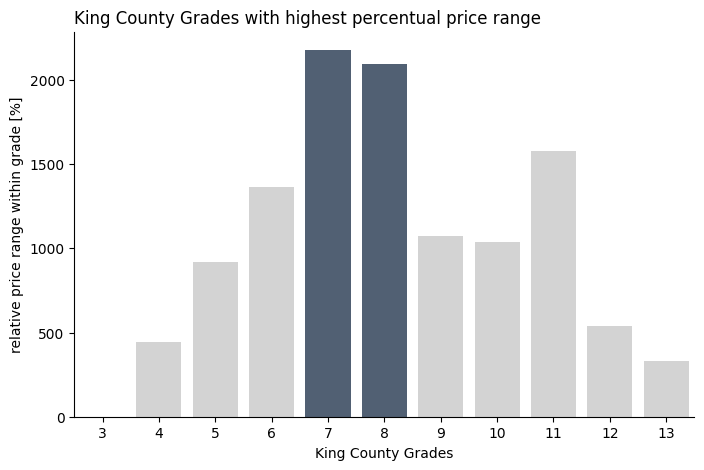

In [44]:
df_graderange['grade_str'] = list(df_graderange.index)
df_graderange['grade_str'] = df_graderange['grade_str'].astype(object)

palette=['#4B6079' if val in [7, 8] else 'lightgrey' for val in sorted(df_graderange['grade_str'].tolist())]

print(palette)
pr_plot = sns.barplot(df_graderange,
                      x = 'grade_str',
                      y = 'price_range',
                     palette = palette)

sns.despine(top=True, right=True, left=False, bottom=False)
plt.title('King County Grades with highest percentual price range', loc = 'left')
plt.xlabel('King County Grades')
plt.ylabel('relative price range within grade [%]')

fig = pr_plot.get_figure()
fig.savefig("./plots/presentation/01_price_grade_differences.png")


In [34]:
# now, focus on those two grades.
df_78 = df.query('grade == 7 | grade == 8')
df_78.describe()

,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_r_clean,yr_r_time
count,15039.000,15039.000,15039.000,15039.000,15039.000,15039.000,15039.000,15039.000,13370.000,15001.000,...,14724.000,15039.000,12349.000,15039.000,15039.000,15039.000,15039.000,15039.000,496.000,496.000
mean,459212.623,4627269542.050,10701.379,3.348,2.039,1889.257,12473.259,1.446,0.004,0.159,...,295.862,1970.382,801.562,98078.796,47.558,-122.223,1835.672,10920.581,1995.663,57.692
std,195735.609,2869240021.858,6185.689,0.889,0.634,597.846,31961.408,0.541,0.063,0.617,...,410.703,28.036,3918.694,53.638,0.144,0.137,464.593,22074.435,15.290,23.856
min,90000.000,1000102.000,1.000,1.000,0.500,550.000,520.000,1.000,0.000,0.000,...,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,659.000,1940.000,9.000
25%,320000.000,2201500107.500,5343.500,3.000,1.750,1440.000,4840.000,1.000,0.000,0.000,...,0.000,1954.000,0.000,98033.000,47.450,-122.333,1490.000,4944.500,1986.000,38.000
50%,425000.000,3990200125.000,10665.000,3.000,2.000,1820.000,7350.000,1.000,0.000,0.000,...,0.000,1972.000,0.000,98065.000,47.574,-122.257,1770.000,7438.000,1998.000,56.000
75%,555000.000,7314800095.000,16000.500,4.000,2.500,2250.000,9847.000,2.000,0.000,0.000,...,580.000,1993.000,0.000,98118.000,47.683,-122.142,2120.000,9586.000,2008.000,75.000
max,3070000.000,9842300540.000,21597.000,33.000,7.500,5370.000,1074218.000,3.500,1.000,4.000,...,2170.000,2015.000,20150.000,98199.000,47.778,-121.319,4480.000,438213.000,2015.000,114.000


In [38]:
# check ideally directly, how many neighborhoods:
df_78.zipcode.value_counts() # ok, that is widespread...

zipcode
98103    523
98115    495
98038    463
98034    459
98117    431
        ... 
98102     63
98010     52
98148     50
98024     40
98039     14
Name: count, Length: 70, dtype: int64

In [49]:
# Divide dataset into upper and lower 'quantiles' and see their differences/main characteristica.
# Then look for houses with upper class characteristica in the lower price range.
df_78.describe()

,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_r_clean,yr_r_time
count,15039.000,15039.000,15039.000,15039.000,15039.000,15039.000,15039.000,15039.000,13370.000,15001.000,...,14724.000,15039.000,12349.000,15039.000,15039.000,15039.000,15039.000,15039.000,496.000,496.000
mean,459212.623,4627269542.050,10701.379,3.348,2.039,1889.257,12473.259,1.446,0.004,0.159,...,295.862,1970.382,801.562,98078.796,47.558,-122.223,1835.672,10920.581,1995.663,57.692
std,195735.609,2869240021.858,6185.689,0.889,0.634,597.846,31961.408,0.541,0.063,0.617,...,410.703,28.036,3918.694,53.638,0.144,0.137,464.593,22074.435,15.290,23.856
min,90000.000,1000102.000,1.000,1.000,0.500,550.000,520.000,1.000,0.000,0.000,...,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,659.000,1940.000,9.000
25%,320000.000,2201500107.500,5343.500,3.000,1.750,1440.000,4840.000,1.000,0.000,0.000,...,0.000,1954.000,0.000,98033.000,47.450,-122.333,1490.000,4944.500,1986.000,38.000
50%,425000.000,3990200125.000,10665.000,3.000,2.000,1820.000,7350.000,1.000,0.000,0.000,...,0.000,1972.000,0.000,98065.000,47.574,-122.257,1770.000,7438.000,1998.000,56.000
75%,555000.000,7314800095.000,16000.500,4.000,2.500,2250.000,9847.000,2.000,0.000,0.000,...,580.000,1993.000,0.000,98118.000,47.683,-122.142,2120.000,9586.000,2008.000,75.000
max,3070000.000,9842300540.000,21597.000,33.000,7.500,5370.000,1074218.000,3.500,1.000,4.000,...,2170.000,2015.000,20150.000,98199.000,47.778,-121.319,4480.000,438213.000,2015.000,114.000


In [53]:
df_78.columns

Index(['date', 'price', 'house_id', 'id', 'year_month', 'bedrooms',
       'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'yr_r_clean', 'yr_bin', 'yr_r_time', 'price_class'],
      dtype='object')

In [50]:
# create price class
df_78['price_class'] = ['upper' if pr > 425000 else 'lower' for pr in df_78.price]

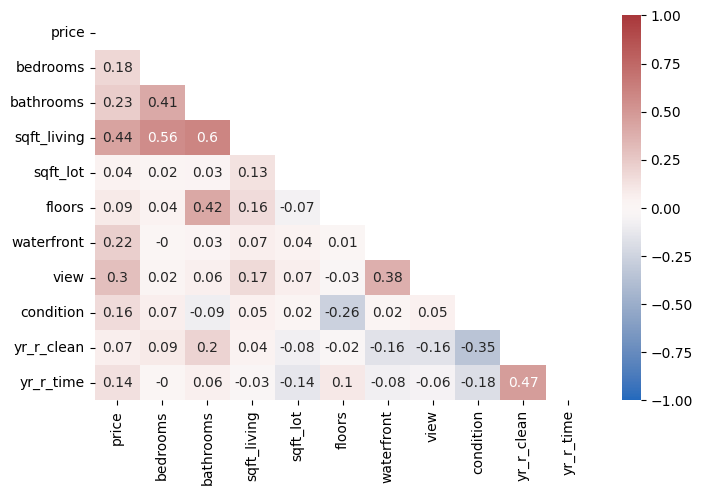

In [60]:
# Create corr matrix to see which values are strongly together:
df_78[['price',
      'bedrooms',
      'bathrooms',
      'sqft_living',
      'sqft_lot',
      'floors',
      'waterfront',
      'view',
      'condition',
      'yr_r_clean',
      'yr_r_time']].corr()

matrix = df_78[['price',
      'bedrooms',
      'bathrooms',
      'sqft_living',
      'sqft_lot',
      'floors',
      'waterfront',
      'view',
      'condition',
      'yr_r_clean',
      'yr_r_time']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

Insights:
 * It doesn't seem like any of those parameters correlates really strong with the parameter.
 * sqft_living is a decent enough proxy for bedrooms and bathrooms
 * sqft_living is also correlated the strongest with the price.

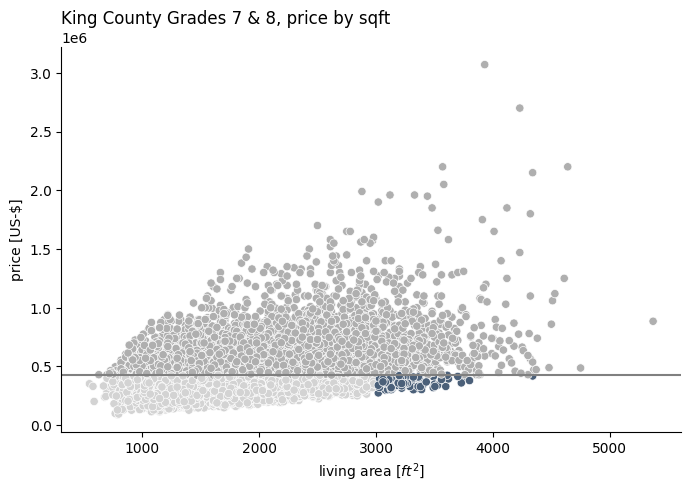

In [81]:
# Define your color palette
palette = {'lower_gt_3000': '#4B6079', 'lower_lt_3000': 'lightgrey', 'upper': '#afafaf'}

# Add a new column to categorize points based on your conditions
df_78['color_category'] = df_78.apply(lambda row: 'lower_gt_3000' if row['price_class'] == 'lower' and row['sqft_living'] > 3000 else 'lower_lt_3000' if row['price_class'] == 'lower' else 'upper', axis=1)

# Set the hue_order based on the categories you created
hue_order = ['lower_gt_3000', 'lower_lt_3000', 'upper']

# Create the scatterplot
medi_priceclass = sns.scatterplot(data=df_78,
                                  x='sqft_living',
                                  y='price',
                                  hue='color_category',
                                  palette=palette,
                                  hue_order=hue_order,
                                 legend = False)

# Optionally, you can adjust legend labels
# medi_priceclass.legend()

sns.despine(top=True, right=True, left=False, bottom=False)
medi_priceclass.axhline(df_78.price.median(), color = 'grey')
plt.title('King County Grades 7 & 8, price by sqft', loc = 'left')
plt.xlabel('living area [$ft^2$]')
plt.ylabel('price [US-$]')

fig = medi_priceclass.get_figure()
fig.savefig("./plots/presentation/03_priceclass_sqft.png")

In [82]:
df_return = df_78.copy()
df_return = df_return.query('sqft_living > 3000')

In [92]:
df_return.groupby('price_class').describe()['yr_r_clean']

,count,mean,std,min,25%,50%,75%,max
price_class,,,,,,,,
lower,3.000,1980.000,15.875,1962.000,1974.000,1986.000,1989.000,1992.000
upper,48.000,1994.958,13.944,1956.000,1985.500,1997.000,2005.500,2015.000


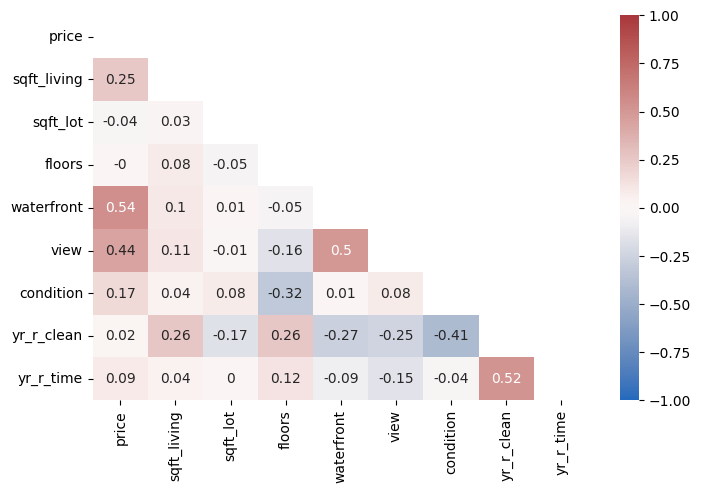

In [93]:
# Questions to ask:
# How do the houses differ?
# - Age?
# - View?
# - Waterfront?
# - Renovation?
# - zipcode?
# - Lot area?

matrix = df_return[['price',
      'sqft_living',
      'sqft_lot',
      'floors',
      'waterfront',
      'view',
      'condition',
      'yr_r_clean',
      'yr_r_time']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

# Ok, then it seems that waterfront and view play a more important role for the price.
# See if there are objects with waterfront and still lower price class

In [97]:
df_return.query('price_class == "lower" & waterfront == 1')
# ok, there are no objects within the lower price class and a waterfront.

,date,price,house_id,id,year_month,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,zipcode,lat,long,sqft_living15,sqft_lot15,yr_r_clean,yr_bin,yr_r_time,price_class,color_category


In [100]:
df_return.query('price_class == "lower" & view > 2')
# house-id 7893800335 may be a candidate.

,date,price,house_id,id,year_month,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,zipcode,lat,long,sqft_living15,sqft_lot15,yr_r_clean,yr_bin,yr_r_time,price_class,color_category
18431,2015-03-13,425000.000,121039042,8444,2015-03,3.000,2.750,3610.000,107386.000,1.500,...,98023,47.335,-122.362,2630.000,42126.000,1962.000,True,44.000,lower,lower_gt_3000
19135,2015-04-30,328000.000,7893800335,1177,2015-04,4.000,3.250,3380.000,7500.000,2.000,...,98198,47.409,-122.330,1920.000,7500.000,NaN,False,NaN,lower,lower_gt_3000


In [104]:
# check the house:
for col in df_return.columns:
    print(df_return[df_return.house_id == 7893800335][col])

19135    2015-04-30
Name: date, dtype: object
19135   328000.000
Name: price, dtype: float64
19135    7893800335
Name: house_id, dtype: int64
19135    1177
Name: id, dtype: int64
19135    2015-04
Name: year_month, dtype: object
19135   4.000
Name: bedrooms, dtype: float64
19135   3.250
Name: bathrooms, dtype: float64
19135   3380.000
Name: sqft_living, dtype: float64
19135   7500.000
Name: sqft_lot, dtype: float64
19135   2.000
Name: floors, dtype: float64
19135   NaN
Name: waterfront, dtype: float64
19135   3.000
Name: view, dtype: float64
19135    3
Name: condition, dtype: int64
19135    7
Name: grade, dtype: int64
19135   2420.000
Name: sqft_above, dtype: float64
19135   960.000
Name: sqft_basement, dtype: float64
19135    1990
Name: yr_built, dtype: int64
19135   NaN
Name: yr_renovated, dtype: float64
19135    98198
Name: zipcode, dtype: int64
19135   47.409
Name: lat, dtype: float64
19135   -122.330
Name: long, dtype: float64
19135   1920.000
Name: sqft_living15, dtype: float64
19

In [121]:
df.shape

(21597, 26)

<Axes: xlabel='condition', ylabel='price'>

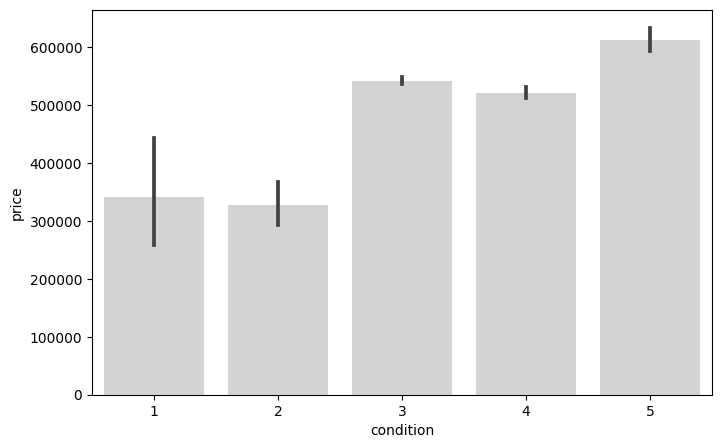

In [107]:
# check condition
sns.barplot(df,
           x = 'condition',
           y = 'price',
           color = 'lightgrey')

<Axes: xlabel='waterfront', ylabel='price'>

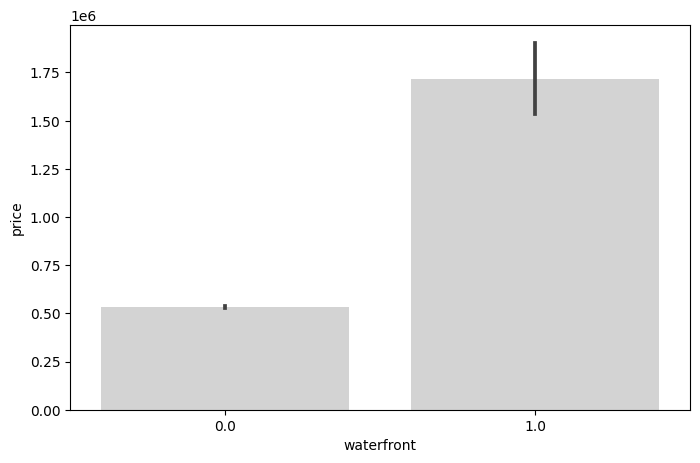

In [109]:
sns.barplot(df,
           x = 'waterfront',
           y = 'price',
           color = 'lightgrey')

In [110]:
# look for cheap houses with waterfront:
df_water = df.copy()

df_water = df_water.query('waterfront == 1')
df_water.describe()
# look at lower 25%

,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_r_clean,yr_r_time
count,146.000,146.000,146.000,146.000,146.000,146.000,146.000,146.000,146.000,145.000,...,142.000,146.000,121.000,146.000,146.000,146.000,146.000,146.000,29.000,29.000
mean,1717214.726,4454968693.048,10216.966,3.349,2.709,3244.753,25870.884,1.630,1.000,3.786,...,748.979,1962.281,4766.281,98096.712,47.540,-122.278,2682.829,22893.699,1988.690,41.517
std,1145384.857,2858044756.510,6427.840,1.099,1.122,1652.135,44629.076,0.548,0.000,0.555,...,809.892,27.119,8524.847,60.600,0.114,0.124,808.410,23264.086,11.971,18.255
min,285000.000,121029034.000,50.000,1.000,0.750,440.000,1989.000,1.000,1.000,1.000,...,0.000,1905.000,0.000,98004.000,47.328,-122.514,750.000,3230.000,1958.000,15.000
25%,827500.000,2016368797.000,4235.750,3.000,1.812,2082.500,11692.250,1.000,1.000,4.000,...,0.000,1941.250,0.000,98040.000,47.453,-122.376,2075.000,11991.500,1984.000,24.000
50%,1510000.000,3692779634.000,10642.000,3.000,2.500,2900.000,17730.500,2.000,1.000,4.000,...,580.000,1959.500,0.000,98075.000,47.548,-122.273,2695.000,16260.500,1990.000,41.000
75%,2282500.000,7390450150.000,15778.750,4.000,3.250,4117.500,26692.500,2.000,1.000,4.000,...,1270.000,1984.750,0.000,98155.000,47.608,-122.210,3140.000,24537.500,1997.000,60.000
max,7060000.000,9808700762.000,21561.000,6.000,6.750,10040.000,505166.000,3.000,1.000,4.000,...,4820.000,2014.000,20090.000,98199.000,47.773,-122.059,4913.000,192268.000,2009.000,71.000


In [111]:
# take lower 25%
df_water = df_water.query('price < 827500')

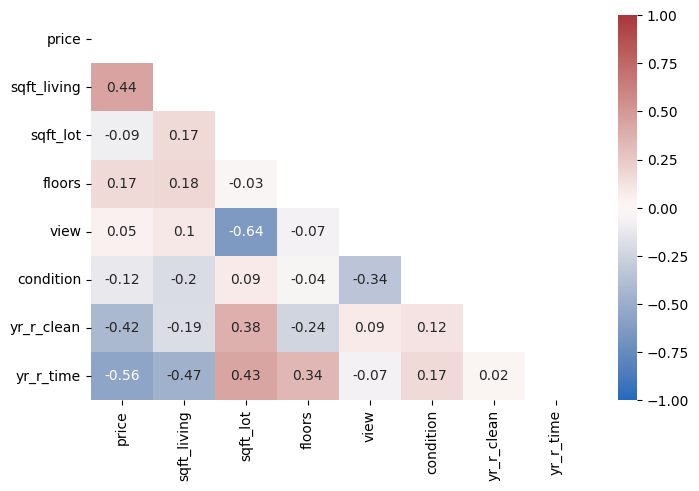

In [112]:
matrix = df_water[['price',
      'sqft_living',
      'sqft_lot',
      'floors',
      'view',
      'condition',
      'yr_r_clean',
      'yr_r_time']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

<Axes: xlabel='condition', ylabel='price'>

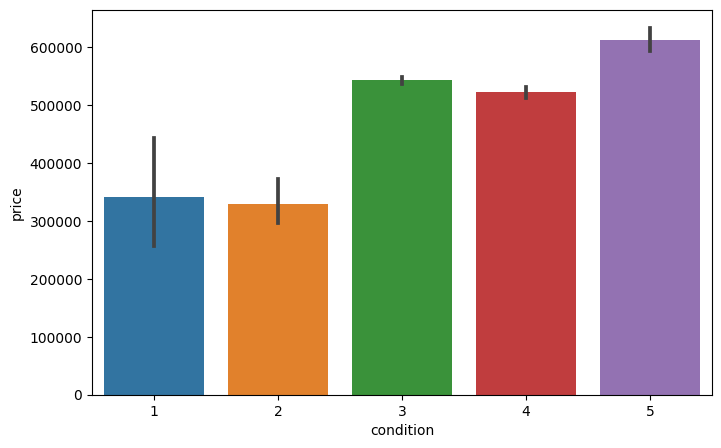

In [120]:
sns.barplot(df,
               x = 'condition',
               y = 'price')

In [4]:
df_middle50 = df.query('price < 645000 & price > 322000')
df_middle50.describe()

,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_r_clean,yr_r_time
count,10780.000,10780.000,10780.000,10780.000,10780.000,10780.000,10780.000,10780.000,9599.000,10752.000,...,10557.000,10780.000,8852.000,10780.000,10780.000,10780.000,10780.000,10780.000,282.000,282.000
mean,461616.966,4636895693.853,10952.273,3.318,2.063,1929.317,14301.501,1.495,0.002,0.137,...,275.750,1971.965,635.124,98081.404,47.590,-122.214,1886.893,12487.920,1993.660,55.706
std,89628.824,2855929244.831,6282.623,0.915,0.650,646.853,36102.317,0.557,0.046,0.560,...,399.855,29.594,3501.596,50.303,0.130,0.146,508.645,26853.969,17.357,23.697
min,322200.000,1200021.000,2.000,1.000,0.750,410.000,600.000,1.000,0.000,0.000,...,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,748.000,1934.000,9.000
25%,385000.000,2224544805.250,5516.500,3.000,1.750,1450.000,4652.750,1.000,0.000,0.000,...,0.000,1952.000,0.000,98034.000,47.512,-122.338,1500.000,4800.000,1984.000,37.000
50%,450000.000,3936900235.000,10928.500,3.000,2.250,1860.000,7203.000,1.000,0.000,0.000,...,0.000,1976.000,0.000,98074.000,47.606,-122.237,1810.000,7264.000,1997.000,55.000
75%,535000.000,7304300821.250,16464.250,4.000,2.500,2330.000,10098.000,2.000,0.000,0.000,...,540.000,1999.000,0.000,98118.000,47.697,-122.121,2230.000,9719.000,2007.000,72.000
max,644500.000,9895000040.000,21597.000,33.000,7.500,5461.000,1074218.000,3.500,1.000,4.000,...,2196.000,2015.000,20150.000,98199.000,47.778,-121.321,4362.000,438213.000,2015.000,114.000


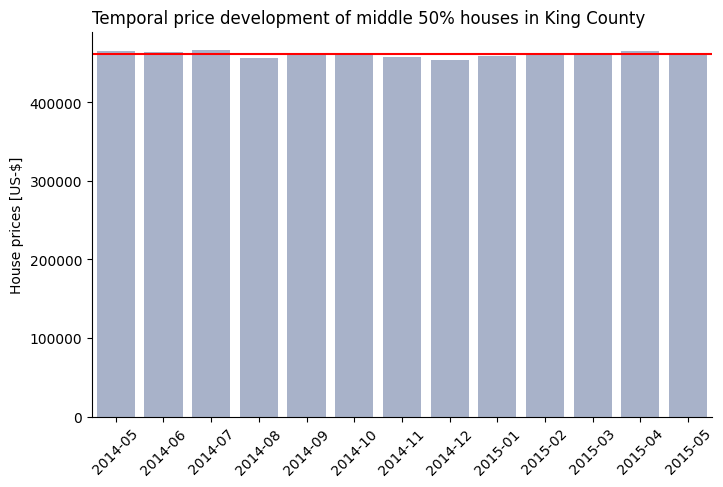

In [8]:
# check prices per month
price_per_month = sns.barplot(df_middle50,
           x = 'year_month',
           y = 'price',
           color = '#a3b0ce',
           ci = False)

sns.despine(top=True, right=True, left=False, bottom=False)
price_per_month.axhline(df_middle50.price.mean(), color = 'red')
price_per_month.set_xticklabels(price_per_month.get_xticklabels(), rotation = 45)
plt.title('Temporal price development of middle 50% houses in King County', loc = 'left')
plt.xlabel(None)
plt.ylabel('House prices [US-$]')

fig = price_per_month.get_figure()
fig.savefig("./plots/presentation/01_price_temp_middle50.png")